In [1]:
import pandas as pd

In [2]:
ress={}
ress_rand={}
nun_seed=11
gamma1=1.5e-4
gamma2=3e-5
for seed in range(1,nun_seed):
    ress[seed] = pd.read_csv(f"./data/eq_05_lrdata_deltas_2_gamma_n_326_d_10_tlim_12_lam_0.5_mu_1e-10_s_{seed}_pe_1_0_trace.gz")    
    ress_rand[seed] = pd.read_csv(f"./data/eq_05_rand_lr_data_deltas_2_gamma_n_326_d_10_tlim_12_lam_0.5_mu_1e-10_s_{seed}_pe_1_0_trace.gz")

<AxesSubplot:>

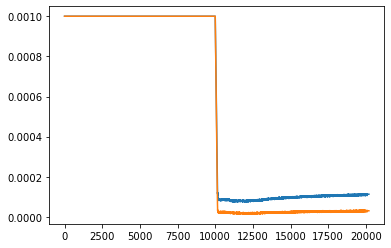

In [3]:
seed=8
ress_rand[seed]["gamma2"].plot()
ress_rand[seed]["gamma1"].plot()

In [4]:
import numpy as np
gammas1=[]
gammas2=[]
gammas1_rand=[]
gammas2_rand=[]
betas = []
betas_rand = []
for seed in range(1,nun_seed):
    gammas1.append(ress[seed]["gamma1"][-100:].mean())
    gammas2.append(ress[seed]["gamma2"][-100:].mean())
    gammas1_rand.append(ress_rand[seed]["gamma1"][-100:].mean())
    gammas2_rand.append(ress_rand[seed]["gamma2"][-100:].mean())
    betas.append(ress[seed]["beta"].iloc[-1])
    betas_rand.append(ress_rand[seed]["beta"].iloc[-1])
gammas1 = np.array(gammas1)
gammas2 = np.array(gammas2)
gammas1_rand = np.array(gammas1_rand)
gammas2_rand = np.array(gammas2_rand)

In [109]:
import numpy as np
loss=[]
loss_rand=[]
for seed in range(1,nun_seed):
    loss.append(ress[seed]["loss"][-100:].mean())
    loss_rand.append(ress_rand[seed]["loss"][-100:].mean())
loss = np.array(loss)
loss_rand = np.array(loss_rand)
resss = pd.DataFrame({"loss":-loss, "loss_rand":-loss_rand, "beta": betas, "beta_rand":betas_rand})
resss["diff_loss"] = -(loss - loss_rand)
resss

,loss,loss_rand,beta,beta_rand,diff_loss
0,-5983.166655,-5995.789780,1.0,1.0,12.623125
1,-6386.661406,-6399.398618,1.0,1.0,12.737212
2,-7604.285400,-7614.247612,1.0,1.0,9.962212
3,-9845.908232,-9848.598203,1.0,1.0,2.689971
4,-9167.227061,-9153.891816,1.0,1.0,-13.335244
5,-6609.402920,-6629.016465,1.0,1.0,19.613545
6,-8684.812168,-8688.818809,1.0,1.0,4.006641
7,-9227.198906,-9229.507461,1.0,1.0,2.308555
8,-9556.747295,-9563.075723,1.0,1.0,6.328428
9,-6977.737803,-6980.387471,1.0,1.0,2.649668


Text(0, 0.5, '$\\gamma$')

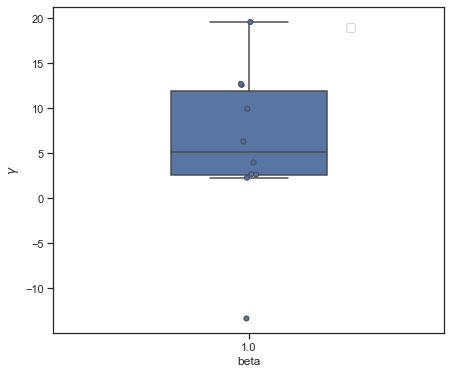

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="beta", y="diff_loss", data=resss,
             width=0.4,fliersize=0)

# Add in points to show each observation
sns.stripplot(x="beta", y="diff_loss", data=resss,
              size=5, linewidth=1, dodge=1, jitter=.02)

# Tweak the visual presentation
#ax.xaxis.grid(True)
ax.set(ylabel="")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], ["$\gamma_1$", "$\gamma_2$"], bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)

#plt.hlines(1.5e-4, -0.7,1.7)
#plt.hlines(3e-5, -0.7,1.7)
ax.set_ylabel("$\gamma$")
#sns.despine(trim=True, left=True)

In [25]:
gammas1_rand.std(), gammas2_rand.std()

(4.179690331675828e-05, 1.4406483303276168e-05)

In [31]:
res_gamma_temp = []
for ii,i in enumerate(gammas1):
    res_gamma_temp.append({"val":gammas1[ii],"type": "gamma1", "model":"true_model", "inst":ii})
    res_gamma_temp.append({"val":gammas2[ii],"type": "gamma2", "model":"true_model", "inst":ii})
    res_gamma_temp.append({"val":gammas1_rand[ii],"type": "gamma1", "model":"null_model", "inst":ii})
    res_gamma_temp.append({"val":gammas2_rand[ii],"type": "gamma2", "model":"null_model" , "inst":ii})
res_gamma = pd.DataFrame(res_gamma_temp)
res_gamma

,val,type,model,inst
0,0.000203,gamma1,true_model,0
1,0.000036,gamma2,true_model,0
2,0.000131,gamma1,null_model,0
3,0.000064,gamma2,null_model,0
4,0.000120,gamma1,true_model,1
5,0.000031,gamma2,true_model,1
6,0.000044,gamma1,null_model,1
7,0.000076,gamma2,null_model,1
8,0.000179,gamma1,true_model,2
9,0.000031,gamma2,true_model,2


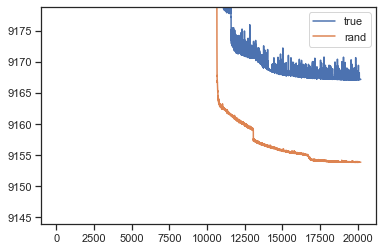

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
seed=5
ress[seed]["loss"].plot(label="true")
ress_rand[seed]["loss"].plot(label="rand")
ax.legend()
ax.set_ylim(ress_rand[seed]["loss"].iloc[-1]-10, ress_rand[seed]["loss"].iloc[-1]+25)
plt.show()


Text(0, 0.5, '$\\gamma$')

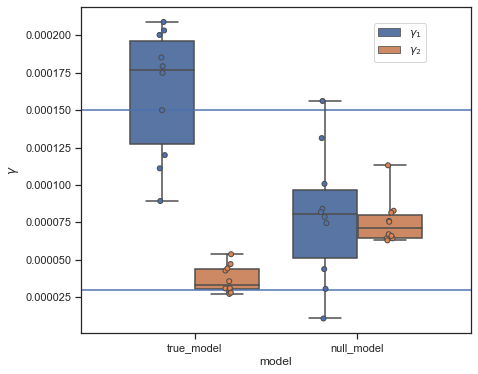

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="model", y="val",hue="type", data=res_gamma,
            whis=[0, 100], width=0.8,fliersize=0)

# Add in points to show each observation
sns.stripplot(x="model", y="val", hue="type", data=res_gamma,
              size=5, linewidth=1, dodge=1, jitter=.05)

# Tweak the visual presentation
#ax.xaxis.grid(True)
ax.set(ylabel="")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], ["$\gamma_1$", "$\gamma_2$"], bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)

plt.hlines(1.5e-4, -0.7,1.7)
plt.hlines(3e-5, -0.7,1.7)
ax.set_ylabel("$\gamma$")
#sns.despine(trim=True, left=True)

(-0.7, 1.7)

In [9]:
resss = pd.DataFrame({"loss":loss, "loss_rand":loss_rand, "beta": betas, "beta_rand":betas_rand})
temp_df = []
for ii,i in enumerate(resss.iloc):
    temp_df.append({"loss":i["loss"],"type": "true_model", "inst":ii})
    temp_df.append({"loss":i["loss_rand"], "type": "null_model", "inst":ii})
res_plot = pd.DataFrame(temp_df)
resss["diff_loss"] = loss - loss_rand
res_plot

,loss,type,inst
0,5983.150244,true_model,0
1,5995.786377,null_model,0
2,6386.599609,true_model,1
3,6399.395508,null_model,1
4,7604.255566,true_model,2
5,7614.246240,null_model,2
6,9845.893164,true_model,3
7,9848.597754,null_model,3
8,9167.214941,true_model,4
9,9153.891504,null_model,4


In [10]:
gammas1

array([2.03299162e-04, 1.19987337e-04, 1.79389346e-04, 1.11141475e-04,
       8.92857570e-05, 2.00304465e-04, 1.74928035e-04, 1.85228884e-04,
       1.50021791e-04, 2.08985308e-04])

In [17]:
gammas1_mean = [gammas1[:i].mean() for i in range(1,len(gammas1)+1)]
gammas1_std = [gammas1[:i].std()/np.sqrt(i) for i in range(1,len(gammas1)+1)]
gammas1_mean, gammas1_std

([0.00020329916151240013,
  0.00016164324915729993,
  0.00016755861482423343,
  0.00015345432984755001,
  0.00014062061527507827,
  0.00015056792350753186,
  0.00015404793936921301,
  0.0001579455574755739,
  0.0001570651390162546,
  0.00016225715589821915],
 [0.0,
  2.945517810280383e-05,
  2.022204345678467e-05,
  1.9473619383917102e-05,
  1.935110769450496e-05,
  1.8506832414942367e-05,
  1.6186883007829372e-05,
  1.4625247754588644e-05,
  1.3026693221991937e-05,
  1.2716684779267578e-05])

In [12]:
resss["diff_loss"].std()/np.sqrt(10)

2.7985225729052767

AttributeError: 'Figure' object has no attribute 'err'

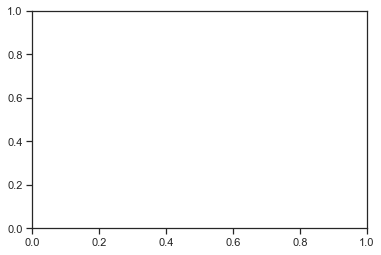

In [13]:
import matplotlib.pyplot as plt
ax, fig = plt.subplots(1)
ax.err

In [18]:
gammas1.mean(), gammas2.mean()

(0.00016225715589821915, 3.711076406034408e-05)

In [19]:
gammas1

array([2.03299162e-04, 1.19987337e-04, 1.79389346e-04, 1.11141475e-04,
       8.92857570e-05, 2.00304465e-04, 1.74928035e-04, 1.85228884e-04,
       1.50021791e-04, 2.08985308e-04])

In [20]:
gammas1_rand.mean(), gammas2_rand.mean()

(7.925755926405926e-05, 7.534584947279613e-05)

In [106]:
gammas1_rand.std(), gammas2_rand.std()

(4.521998178012648e-05, 9.092196655842168e-06)

In [107]:
loss, loss_rand

(array([5983.15024414, 6386.59960938, 7604.25556641, 9845.89316406,
        9167.21494141, 6609.38164062, 8684.79677734, 9227.19042969,
        9556.71289062, 6977.72480469]),
 array([5999.97211914, 6392.50141602, 7617.45683594, 9848.64853516,
        9159.37451172, 6636.19462891, 8687.70625   , 9231.10664062,
        9563.28398438, 6979.9019043 ]))

In [108]:
loss.mean(), loss_rand.mean()

(8004.292006835936, 8011.614682617187)

In [109]:
(loss/loss_rand).mean()

0.998931772384001

In [110]:
resss = pd.DataFrame({"loss":loss, "loss_rand":loss_rand, "beta": betas, "beta_rand":betas_rand})
resss

,loss,loss_rand,beta,beta_rand
0,5983.150244,5999.972119,1.0,1.0
1,6386.599609,6392.501416,1.0,1.0
2,7604.255566,7617.456836,1.0,1.0
3,9845.893164,9848.648535,1.0,1.0
4,9167.214941,9159.374512,1.0,1.0
5,6609.381641,6636.194629,1.0,1.0
6,8684.796777,8687.706250,1.0,1.0
7,9227.190430,9231.106641,1.0,1.0
8,9556.712891,9563.283984,1.0,1.0
9,6977.724805,6979.901904,1.0,1.0


In [111]:
res["gamma1"][0:].rolling(100).mean().plot()

NameError: name 'res' is not defined